# Pymaceuticals Inc
GWU Data Analytics Bootcamp Homework 5

### Observations

* Of the various drug treatments, only Capomulin and Ramicane consistently perform significantly better than the Placebo.
* The difference in performance between Capomulin and Ramicane is likely not statistically significant.
* Ketapril appears to perform worse than the Placebo in tests regarding tumor growth and metastatic sites, but that difference is likely not statistically significant. 

In [1]:
# Import Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Find and read in clinical trial data

trial_csv = "raw_data/clinicaltrial_data.csv"
trial_df = pd.read_csv(trial_csv)

# Find and read in mouse data, removing Mouse ID associated with multiple drugs

mouse_csv = "raw_data/mouse_drug_data.csv"
mouse_df = pd.read_csv(mouse_csv)
mouse_df = mouse_df.loc[mouse_df['Mouse ID'] != "g989", :]

# Merge Data Sets

df = pd.merge(trial_df, mouse_df, on="Mouse ID")
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


### Tumor Response to Treatment

In [2]:
# Group Data by Drug and Timepoint

grouped_df = df.groupby(['Drug', 'Timepoint'])

# Calculate average tumor volume per checkpoint for each drug
# Calculate standard error of the means

avg_tumor_df = grouped_df.agg({'Tumor Volume (mm3)':['mean', 'sem']})

# Format dataframe

avg_tumor_df_reset = avg_tumor_df.reset_index()
avg_tumor_df_reset.columns = ['Drug', 'Timepoint', 'Tumor Mean', 'Tumor Error']

# Pivot data for better printing

drugs_tumors_df = avg_tumor_df_reset.pivot(index="Timepoint", columns="Drug", values="Tumor Mean")

# Print data

drugs_tumors_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


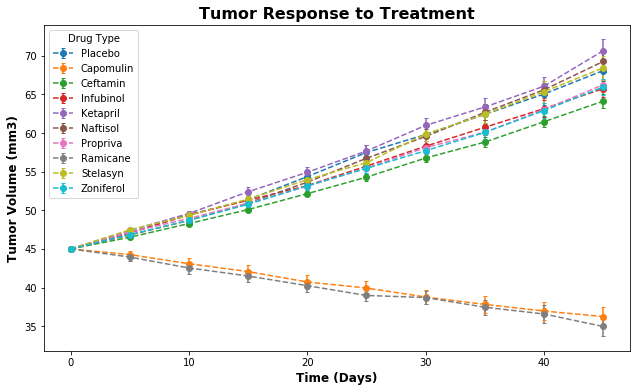

In [3]:
# Divide aggregated dataset by drug type

placebo_tumor_df = avg_tumor_df_reset.loc[avg_tumor_df_reset['Drug'] == 'Placebo', :]
capomulin_tumor_df = avg_tumor_df_reset.loc[avg_tumor_df_reset['Drug'] == 'Capomulin', :]
ceftamin_tumor_df = avg_tumor_df_reset.loc[avg_tumor_df_reset['Drug'] == 'Ceftamin', :]
infubinol_tumor_df = avg_tumor_df_reset.loc[avg_tumor_df_reset['Drug'] == 'Infubinol', :]
ketapril_tumor_df = avg_tumor_df_reset.loc[avg_tumor_df_reset['Drug'] == 'Ketapril', :]
naftisol_tumor_df = avg_tumor_df_reset.loc[avg_tumor_df_reset['Drug'] == 'Naftisol', :]
propriva_tumor_df = avg_tumor_df_reset.loc[avg_tumor_df_reset['Drug'] == 'Propriva', :]
ramicane_tumor_df = avg_tumor_df_reset.loc[avg_tumor_df_reset['Drug'] == 'Ramicane', :]
stelasyn_tumor_df = avg_tumor_df_reset.loc[avg_tumor_df_reset['Drug'] == 'Stelasyn', :]
zoniferol_tumor_df = avg_tumor_df_reset.loc[avg_tumor_df_reset['Drug'] == 'Zoniferol', :]

# Assign tumor volume means and standard errors to distinct variables for each drug

placebo_tumor_means = placebo_tumor_df['Tumor Mean']
placebo_tumor_errors = placebo_tumor_df['Tumor Error']

capomulin_tumor_means = capomulin_tumor_df['Tumor Mean']
capomulin_tumor_errors = capomulin_tumor_df['Tumor Error']

ceftamin_tumor_means = ceftamin_tumor_df['Tumor Mean']
ceftamin_tumor_errors = ceftamin_tumor_df['Tumor Error']

infubinol_tumor_means = infubinol_tumor_df['Tumor Mean']
infubinol_tumor_errors = infubinol_tumor_df['Tumor Error']

ketapril_tumor_means = ketapril_tumor_df['Tumor Mean']
ketapril_tumor_errors = ketapril_tumor_df['Tumor Error']

naftisol_tumor_means = naftisol_tumor_df['Tumor Mean']
naftisol_tumor_errors = naftisol_tumor_df['Tumor Error']

propriva_tumor_means = propriva_tumor_df['Tumor Mean']
propriva_tumor_errors = propriva_tumor_df['Tumor Error']

ramicane_tumor_means = ramicane_tumor_df['Tumor Mean']
ramicane_tumor_errors = ramicane_tumor_df['Tumor Error']

stelasyn_tumor_means = stelasyn_tumor_df['Tumor Mean']
stelasyn_tumor_errors = stelasyn_tumor_df['Tumor Error']

zoniferol_tumor_means = zoniferol_tumor_df['Tumor Mean']
zoniferol_tumor_errors = zoniferol_tumor_df['Tumor Error']

# Set x-axis values for chart

x_axis = drugs_tumors_df.index.values

# Format chart (size, labels, title)

fig, ax = plt.subplots(figsize=(10.5,6))
ax.set_xlabel("Time (Days)", fontsize=12, fontweight='bold')
ax.set_ylabel("Tumor Volume (mm3)", fontsize=12, fontweight='bold')
ax.set_title("Tumor Response to Treatment", fontsize=16, fontweight='bold')

# Add data to chart

ax.errorbar(x_axis, placebo_tumor_means, placebo_tumor_errors, fmt="--o", capsize=2, label="Placebo")
ax.errorbar(x_axis, capomulin_tumor_means, capomulin_tumor_errors, fmt="--o", capsize=2, label="Capomulin")
ax.errorbar(x_axis, ceftamin_tumor_means, ceftamin_tumor_errors, fmt="--o", capsize=2, label="Ceftamin")
ax.errorbar(x_axis, infubinol_tumor_means, infubinol_tumor_errors, fmt="--o", capsize=2, label="Infubinol")
ax.errorbar(x_axis, ketapril_tumor_means, ketapril_tumor_errors, fmt="--o", capsize=2, label="Ketapril")
ax.errorbar(x_axis, naftisol_tumor_means, naftisol_tumor_errors, fmt="--o", capsize=2, label="Naftisol")
ax.errorbar(x_axis, propriva_tumor_means, propriva_tumor_errors, fmt="--o", capsize=2, label="Propriva")
ax.errorbar(x_axis, ramicane_tumor_means, ramicane_tumor_errors, fmt="--o", capsize=2, label="Ramicane")
ax.errorbar(x_axis, stelasyn_tumor_means, stelasyn_tumor_errors, fmt="--o", capsize=2, label="Stelasyn")
ax.errorbar(x_axis, zoniferol_tumor_means, zoniferol_tumor_errors, fmt="--o", capsize=2, label="Zoniferol")

# Add Legend

ax.legend(loc="upper left", title="Drug Type")

### Metastatic Response to Treatment

In [4]:
# Calculate average tumor volume per checkpoint for each drug
# Calculate standard error of the means

avg_sites_df = grouped_df.agg({'Metastatic Sites':['mean', 'sem']})

# Format dataframe

avg_sites_df_reset = avg_sites_df.reset_index()
avg_sites_df_reset.columns = ['Drug', 'Timepoint', 'Metastatic Mean', 'Metastatic Error']

# Pivot data for better printing

drugs_sites_df = avg_sites_df_reset.pivot(index="Timepoint", columns="Drug", values="Metastatic Mean")

# Print data

drugs_sites_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.384615,0.652174,1.166667,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.666667,0.782609,1.411765,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.333333,0.952381,1.533333,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


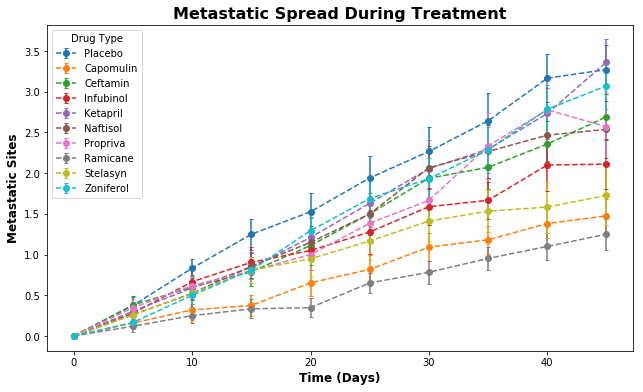

In [5]:
# Divide aggregated dataset by drug type

placebo_sites_df = avg_sites_df_reset.loc[avg_sites_df_reset['Drug'] == 'Placebo', :]
capomulin_sites_df = avg_sites_df_reset.loc[avg_sites_df_reset['Drug'] == 'Capomulin', :]
ceftamin_sites_df = avg_sites_df_reset.loc[avg_sites_df_reset['Drug'] == 'Ceftamin', :]
infubinol_sites_df = avg_sites_df_reset.loc[avg_sites_df_reset['Drug'] == 'Infubinol', :]
ketapril_sites_df = avg_sites_df_reset.loc[avg_sites_df_reset['Drug'] == 'Ketapril', :]
naftisol_sites_df = avg_sites_df_reset.loc[avg_sites_df_reset['Drug'] == 'Naftisol', :]
propriva_sites_df = avg_sites_df_reset.loc[avg_sites_df_reset['Drug'] == 'Propriva', :]
ramicane_sites_df = avg_sites_df_reset.loc[avg_sites_df_reset['Drug'] == 'Ramicane', :]
stelasyn_sites_df = avg_sites_df_reset.loc[avg_sites_df_reset['Drug'] == 'Stelasyn', :]
zoniferol_sites_df = avg_sites_df_reset.loc[avg_sites_df_reset['Drug'] == 'Zoniferol', :]

# Assign tumor volume means and standard errors to distinct variables for each drug

placebo_sites_means = placebo_sites_df['Metastatic Mean']
placebo_sites_errors = placebo_sites_df['Metastatic Error']

capomulin_sites_means = capomulin_sites_df['Metastatic Mean']
capomulin_sites_errors = capomulin_sites_df['Metastatic Error']

ceftamin_sites_means = ceftamin_sites_df['Metastatic Mean']
ceftamin_sites_errors = ceftamin_sites_df['Metastatic Error']

infubinol_sites_means = infubinol_sites_df['Metastatic Mean']
infubinol_sites_errors = infubinol_sites_df['Metastatic Error']

ketapril_sites_means = ketapril_sites_df['Metastatic Mean']
ketapril_sites_errors = ketapril_sites_df['Metastatic Error']

naftisol_sites_means = naftisol_sites_df['Metastatic Mean']
naftisol_sites_errors = naftisol_sites_df['Metastatic Error']

propriva_sites_means = propriva_sites_df['Metastatic Mean']
propriva_sites_errors = propriva_sites_df['Metastatic Error']

ramicane_sites_means = ramicane_sites_df['Metastatic Mean']
ramicane_sites_errors = ramicane_sites_df['Metastatic Error']

stelasyn_sites_means = stelasyn_sites_df['Metastatic Mean']
stelasyn_sites_errors = stelasyn_sites_df['Metastatic Error']

zoniferol_sites_means = zoniferol_sites_df['Metastatic Mean']
zoniferol_sites_errors = zoniferol_sites_df['Metastatic Error']

# Set x-axis values for chart

x_axis = drugs_sites_df.index.values

# Format chart (size, labels, title)

fig, ax = plt.subplots(figsize=(10.5,6))
ax.set_xlabel("Time (Days)", fontsize=12, fontweight='bold')
ax.set_ylabel("Metastatic Sites", fontsize=12, fontweight='bold')
ax.set_title("Metastatic Spread During Treatment", fontsize=16, fontweight='bold')

# Add data to chart

ax.errorbar(x_axis, placebo_sites_means, placebo_sites_errors, fmt="--o", capsize=2, label="Placebo")
ax.errorbar(x_axis, capomulin_sites_means, capomulin_sites_errors, fmt="--o", capsize=2, label="Capomulin")
ax.errorbar(x_axis, ceftamin_sites_means, ceftamin_sites_errors, fmt="--o", capsize=2, label="Ceftamin")
ax.errorbar(x_axis, infubinol_sites_means, infubinol_sites_errors, fmt="--o", capsize=2, label="Infubinol")
ax.errorbar(x_axis, ketapril_sites_means, ketapril_sites_errors, fmt="--o", capsize=2, label="Ketapril")
ax.errorbar(x_axis, naftisol_sites_means, naftisol_sites_errors, fmt="--o", capsize=2, label="Naftisol")
ax.errorbar(x_axis, propriva_sites_means, propriva_sites_errors, fmt="--o", capsize=2, label="Propriva")
ax.errorbar(x_axis, ramicane_sites_means, ramicane_sites_errors, fmt="--o", capsize=2, label="Ramicane")
ax.errorbar(x_axis, stelasyn_sites_means, stelasyn_sites_errors, fmt="--o", capsize=2, label="Stelasyn")
ax.errorbar(x_axis, zoniferol_sites_means, zoniferol_sites_errors, fmt="--o", capsize=2, label="Zoniferol")

# Add Legend

ax.legend(loc="upper left", title="Drug Type")

### Survival Rate

In [6]:
# Calculate surviving mouse count at each timepoint for each drug

mouse_count_df = grouped_df['Mouse ID'].count()

# Reset index on dataframe to facilitate pivoting and graphing

mouse_count_df_reset = mouse_count_df.reset_index()

# Pivot data for better printing

drugs_mice_df = mouse_count_df_reset.pivot(index="Timepoint", columns="Drug", values="Mouse ID")

# Print data

drugs_mice_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17
25,22,18,18,19,18,17,13,23,18,16
30,22,16,17,18,15,15,12,23,17,15
35,22,14,12,17,15,14,9,21,15,14
40,21,14,10,15,15,12,9,20,12,14


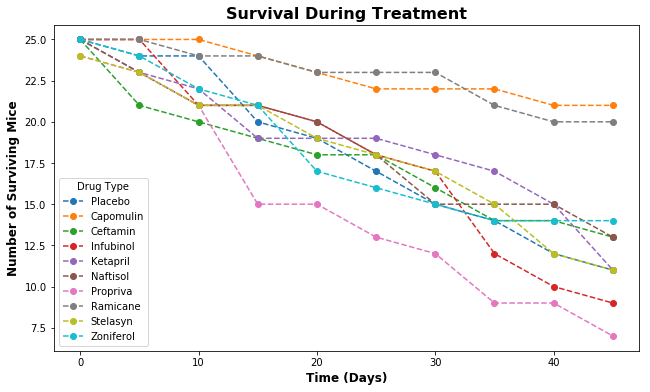

In [7]:
# Divide aggregated dataset by drug type

placebo_mice_df = mouse_count_df_reset.loc[mouse_count_df_reset['Drug'] == 'Placebo', :]
capomulin_mice_df = mouse_count_df_reset.loc[mouse_count_df_reset['Drug'] == 'Capomulin', :]
ceftamin_mice_df = mouse_count_df_reset.loc[mouse_count_df_reset['Drug'] == 'Ceftamin', :]
infubinol_mice_df = mouse_count_df_reset.loc[mouse_count_df_reset['Drug'] == 'Infubinol', :]
ketapril_mice_df = mouse_count_df_reset.loc[mouse_count_df_reset['Drug'] == 'Ketapril', :]
naftisol_mice_df = mouse_count_df_reset.loc[mouse_count_df_reset['Drug'] == 'Naftisol', :]
propriva_mice_df = mouse_count_df_reset.loc[mouse_count_df_reset['Drug'] == 'Propriva', :]
ramicane_mice_df = mouse_count_df_reset.loc[mouse_count_df_reset['Drug'] == 'Ramicane', :]
stelasyn_mice_df = mouse_count_df_reset.loc[mouse_count_df_reset['Drug'] == 'Stelasyn', :]
zoniferol_mice_df = mouse_count_df_reset.loc[mouse_count_df_reset['Drug'] == 'Zoniferol', :]

# Set x-axis values for chart

x_axis = drugs_mice_df.index.values

# Format chart (size, labels, title)

plt.subplots(figsize=(10.5,6))
plt.xlabel("Time (Days)", fontsize=12, fontweight='bold')
plt.ylabel("Number of Surviving Mice", fontsize=12, fontweight='bold')
plt.title("Survival During Treatment", fontsize=16, fontweight='bold')

# Add data to chart

plt.plot(placebo_mice_df['Timepoint'], placebo_mice_df['Mouse ID'], '--o', label="Placebo")
plt.plot(capomulin_mice_df['Timepoint'], capomulin_mice_df['Mouse ID'], '--o', label="Capomulin")
plt.plot(ceftamin_mice_df['Timepoint'], ceftamin_mice_df['Mouse ID'], '--o', label="Ceftamin")
plt.plot(infubinol_mice_df['Timepoint'], infubinol_mice_df['Mouse ID'], '--o', label="Infubinol")
plt.plot(ketapril_mice_df['Timepoint'], ketapril_mice_df['Mouse ID'], '--o', label="Ketapril")
plt.plot(naftisol_mice_df['Timepoint'], naftisol_mice_df['Mouse ID'], '--o', label="Naftisol")
plt.plot(propriva_mice_df['Timepoint'], propriva_mice_df['Mouse ID'], '--o', label="Propriva")
plt.plot(ramicane_mice_df['Timepoint'], ramicane_mice_df['Mouse ID'], '--o', label="Ramicane")
plt.plot(stelasyn_mice_df['Timepoint'], stelasyn_mice_df['Mouse ID'], '--o', label="Stelasyn")
plt.plot(zoniferol_mice_df['Timepoint'], zoniferol_mice_df['Mouse ID'], '--o', label="Zoniferol")

# Add Legend

plt.legend(loc="best", title="Drug Type")

### Percent Change in Tumor Volume

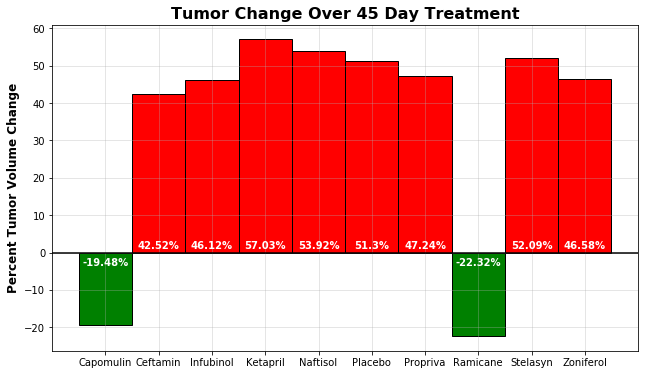

In [8]:
# Format aggregated tumor volume dataframe

percent_change_df = avg_tumor_df.xs('Tumor Volume (mm3)', axis=1, drop_level=True)
percent_change_df_reset = percent_change_df.reset_index()

# Filter data to average tumor volume at final timepoint

percent_change_df_fortyfive = percent_change_df_reset.loc[percent_change_df_reset['Timepoint'] == 45, ['Drug', 'mean']]

# Calculate percent change in tumor volume for each drug

percent_change_df_fortyfive['Percent Change'] = ((percent_change_df_fortyfive['mean'] - 45) / 45) * 100

# Create function to calculate whether percent change is positive or negative
# Function returns True if positive or zero and False if negative

def above_zero(row):
    if row['Percent Change'] >= 0 :
        return True
    else:
        return False

# Add column to dataframe indicating whether percent change is positive or negative
    
percent_change_df_fortyfive['above_zero'] = percent_change_df_fortyfive.apply (lambda row: above_zero (row),axis=1)

# Assign aspects of data needed for charting to variables

percent_change = percent_change_df_fortyfive['Percent Change']
xlabels = percent_change_df_fortyfive['Drug']
x_axis = np.arange(len(percent_change))

fig, ax = plt.subplots(figsize=(10.5, 6))
percent_plot = ax.bar(x_axis, percent_change, width=1.0, edgecolor="black", color=percent_change_df_fortyfive.above_zero.map({True: 'r', False: 'g'}))
ax.set_xticks(x_axis)
ax.set_xticklabels(xlabels)

ax.set_ylabel("Percent Tumor Volume Change", fontsize=12, fontweight="bold")
ax.set_xlabel("")
ax.set_title("Tumor Change Over 45 Day Treatment", fontsize=16, fontweight="bold")

plt.axhline(y=0, color="black", linestyle='-')
plt.grid(alpha=0.4)

# Create function to calculate where to add data labels to chart and what text to add and to place labels

def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        p_height = (height / y_height)

        if height > 0:
            label_position = 0.5
        elif height < 0:
            label_position = -4

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                str(round(height, 2))+'%',
                ha='center', va='bottom', color="white", fontweight="bold")

# Calculate data labels and add to chart
        
autolabel(percent_plot, ax)